In [1]:
import pandas as pd
import numpy as np

# Preprocessing

### Load data

There are no null-values or na values in the data. All values have dtype `int64`.

In [2]:
# Load the heart dataset
data = pd.read_csv("customer_data_large.csv")

# Check the dimensions of the dataset
dataset_dimensions = data.shape

print("The dataset has {} rows and {} colums.".format(dataset_dimensions[0],dataset_dimensions[1]))

print(f'The data has {data.isnull().sum().sum()} null values')
print(f'The data has {data.isna().sum().sum()} na values')

data.info()
data.describe()

The dataset has 2230 rows and 14 colums.
The data has 0 null values
The data has 0 na values
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2230 entries, 0 to 2229
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Education           2230 non-null   int64
 1   Kidhome             2230 non-null   int64
 2   Recency             2230 non-null   int64
 3   MntWines            2230 non-null   int64
 4   MntFruits           2230 non-null   int64
 5   MntSweetProducts    2230 non-null   int64
 6   MntGoldProds        2230 non-null   int64
 7   NumWebPurchases     2230 non-null   int64
 8   NumStorePurchases   2230 non-null   int64
 9   NumWebVisitsMonth   2230 non-null   int64
 10  Age                 2230 non-null   int64
 11  Years_customer      2230 non-null   int64
 12  Num_AcceptedCmp     2230 non-null   int64
 13  MntFishMeatProdcts  2230 non-null   int64
dtypes: int64(14)
memory usage: 244.0 KB


,Education,Kidhome,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Num_AcceptedCmp,MntFishMeatProdcts
count,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.00000
mean,3.458744,0.444395,49.167713,304.093722,26.269058,27.114350,43.849776,4.847534,5.795964,7.106726,50.940359,8.972197,0.445740,204.52287
std,1.003293,0.538598,28.955724,336.930422,39.721905,41.335228,51.895444,3.067080,3.254714,4.069197,10.877867,0.683811,0.889835,260.66920
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,8.000000,0.000000,1.00000
25%,3.000000,0.000000,24.000000,24.000000,1.000000,1.000000,9.000000,3.000000,3.000000,4.000000,43.000000,9.000000,0.000000,21.00000
50%,3.000000,0.000000,50.000000,173.000000,8.000000,8.000000,24.000000,4.000000,5.000000,7.000000,49.000000,9.000000,0.000000,80.00000
75%,4.000000,1.000000,74.000000,504.750000,33.000000,33.000000,56.000000,7.000000,8.000000,8.000000,59.000000,9.000000,1.000000,306.75000
max,5.000000,2.000000,99.000000,1493.000000,199.000000,263.000000,362.000000,32.000000,13.000000,20.000000,81.000000,10.000000,5.000000,1727.00000


### Visualize data

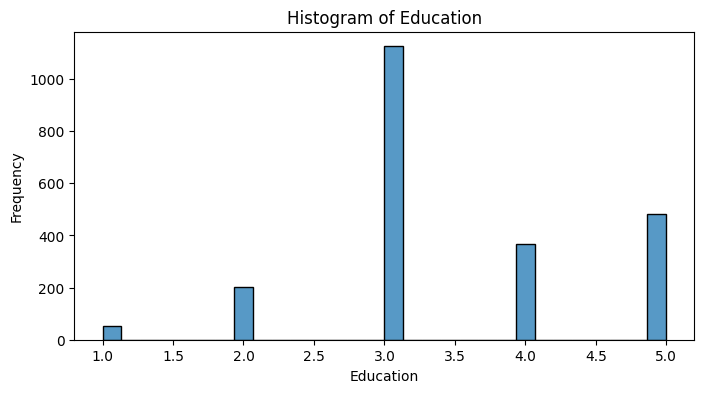

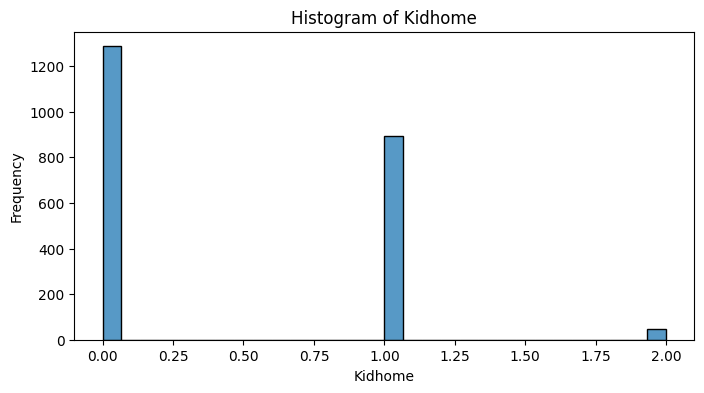

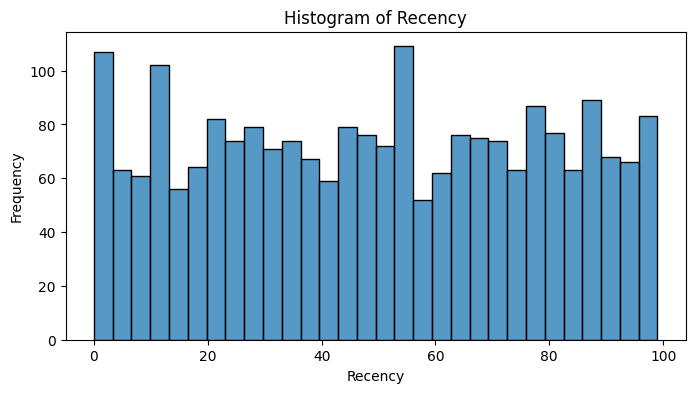

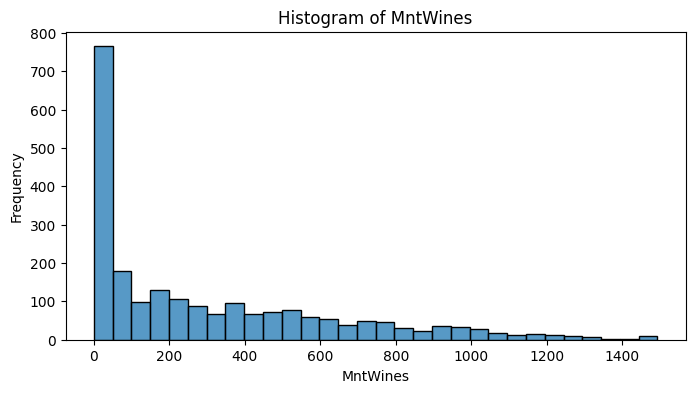

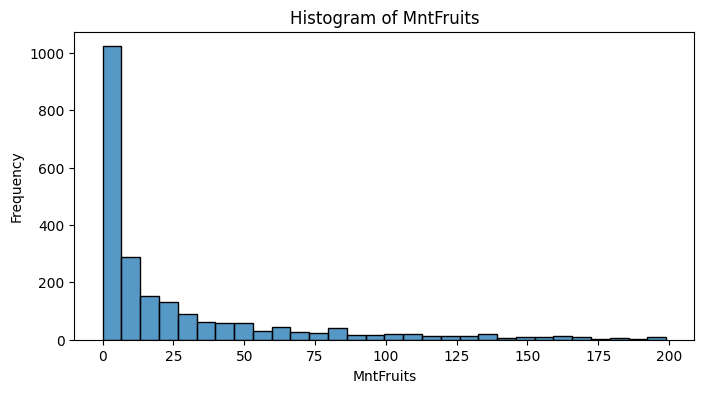

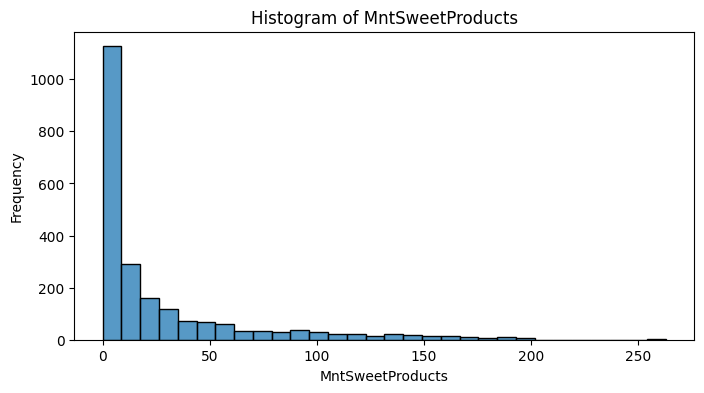

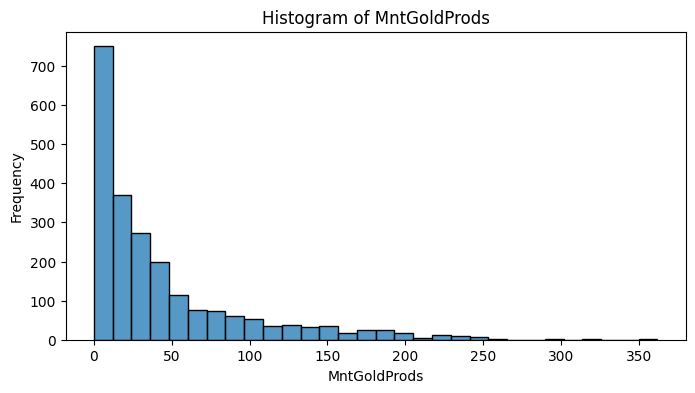

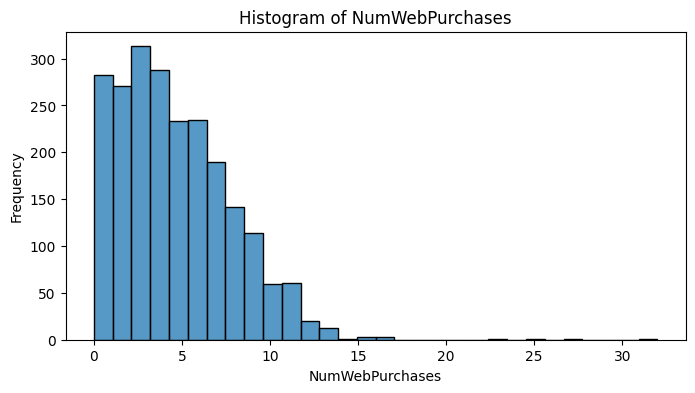

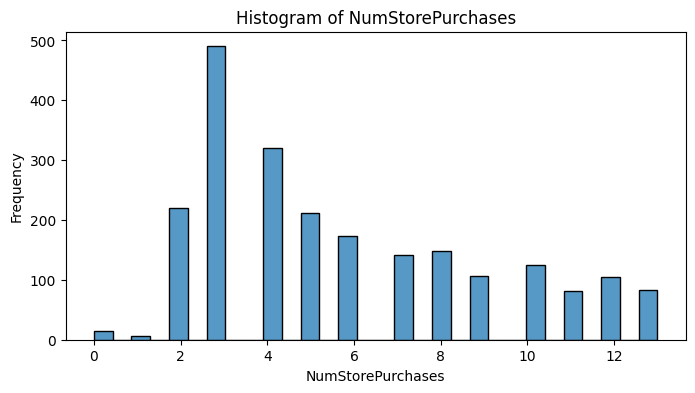

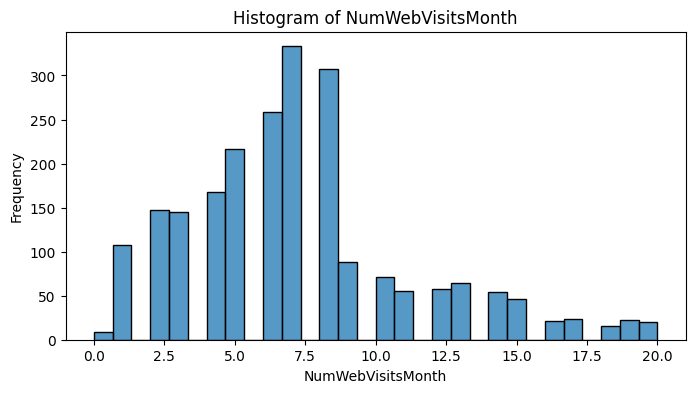

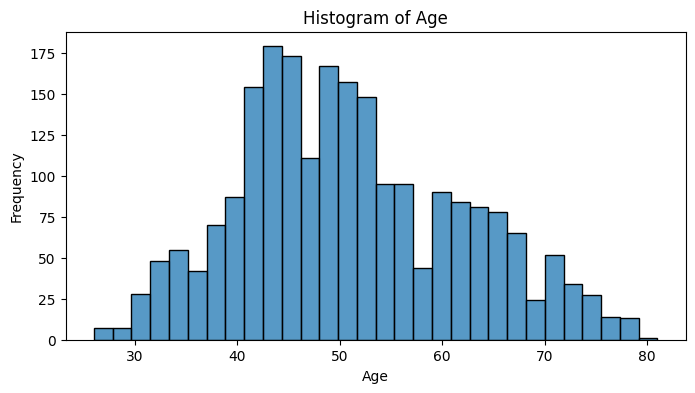

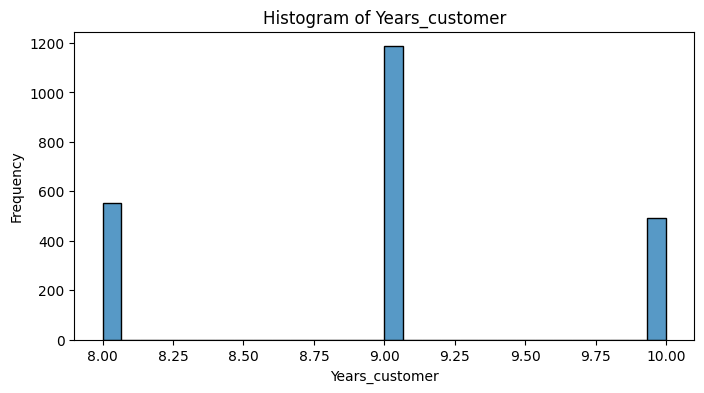

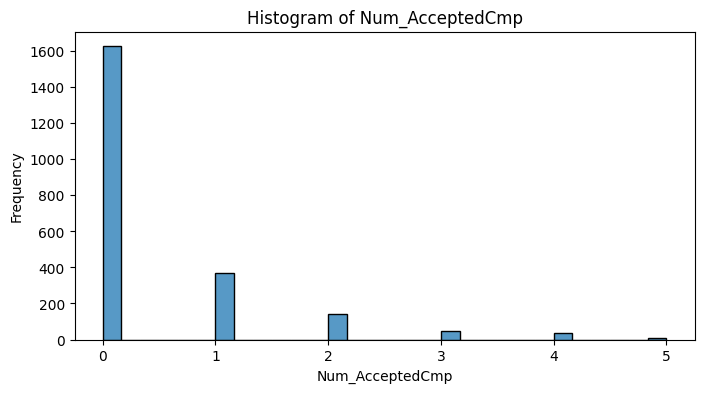

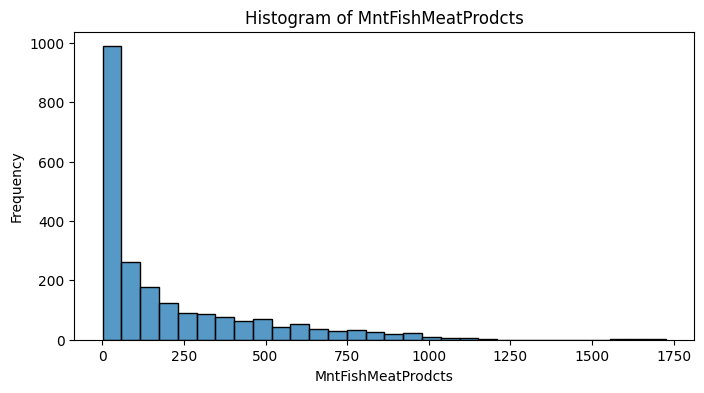

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

def show_numerical_figures(df):
    columns = df.columns.tolist()
    for col in columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col],  bins=30)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()


show_numerical_figures(data)

### Aggregate new features

For this unsupervised problem, there are a number of features one can extract by combining exisitng features.

In [4]:
data['TotalSpend'] = data[['MntWines', 'MntFruits', 'MntSweetProducts', 'MntGoldProds', 'NumWebVisitsMonth']].sum(axis=1)

data['AvgSpendPerPurchase'] = data['TotalSpend'] / (data['NumWebPurchases'] + data['NumStorePurchases'] + 1)

data['TotalPurchases'] = data[['NumWebPurchases', 'NumStorePurchases']].sum(axis=1)

data.describe()

,Education,Kidhome,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Num_AcceptedCmp,MntFishMeatProdcts,TotalSpend,AvgSpendPerPurchase,TotalPurchases
count,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.000000,2230.00000,2230.000000,2230.000000,2230.000000
mean,3.458744,0.444395,49.167713,304.093722,26.269058,27.114350,43.849776,4.847534,5.795964,7.106726,50.940359,8.972197,0.445740,204.52287,408.433632,29.649088,10.643498
std,1.003293,0.538598,28.955724,336.930422,39.721905,41.335228,51.895444,3.067080,3.254714,4.069197,10.877867,0.683811,0.889835,260.66920,398.351490,26.573997,5.318209
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,26.000000,8.000000,0.000000,1.00000,4.000000,1.250000,0.000000
25%,3.000000,0.000000,24.000000,24.000000,1.000000,1.000000,9.000000,3.000000,3.000000,4.000000,43.000000,9.000000,0.000000,21.00000,54.000000,8.616667,6.000000
50%,3.000000,0.000000,50.000000,173.000000,8.000000,8.000000,24.000000,4.000000,5.000000,7.000000,49.000000,9.000000,0.000000,80.00000,272.000000,22.342308,10.000000
75%,4.000000,1.000000,74.000000,504.750000,33.000000,33.000000,56.000000,7.000000,8.000000,8.000000,59.000000,9.000000,1.000000,306.75000,678.500000,41.321429,15.000000
max,5.000000,2.000000,99.000000,1493.000000,199.000000,263.000000,362.000000,32.000000,13.000000,20.000000,81.000000,10.000000,5.000000,1727.00000,1732.000000,188.222222,32.000000


### Check pairwise correlation

# TODO - write about correlations

In [5]:
matrix = data.corr(method='pearson')

# Don't check pairwise relevances twices
checked_features= []
count = 0
threshold = 0.7

relevance_dict = {}

for col in data.columns.tolist():
    checked_features.append(col)
    for val in matrix[col].items():
        current_col = val[0]
        relevance = val[1]
        if relevance > threshold and current_col not in checked_features:
            if relevance in relevance_dict.keys():
                relevance_dict[relevance].append((col, current_col))
            else:
                relevance_dict[relevance] = [(col, current_col)]


if not relevance_dict:
    print(f'No variables with significance above {threshold}')
else:
    sorted_relevances = sorted(relevance_dict.keys(), reverse=True)
    for relevance in sorted_relevances:
        relationships = relevance_dict[relevance]
        for relationship in relationships:
            print(f'{relationship[0]} and {relationship[1]} have correlation {relevance}')

MntWines and TotalSpend have correlation 0.9734633562094147
TotalSpend and AvgSpendPerPurchase have correlation 0.9155866721587391
MntWines and AvgSpendPerPurchase have correlation 0.8938255691461292
NumStorePurchases and TotalPurchases have correlation 0.8512653529082539
NumWebPurchases and TotalPurchases have correlation 0.830621752349993
TotalSpend and TotalPurchases have correlation 0.70799472366928


### Outliers

To analyze outliers, we start by taking a look at box plots of features with potential outliers as well as identifying the number of instances falling out of range. These include the 'amount'-features, and the 'purchases'- and 'visits'-features.

In [6]:
def IQR_bounds(dataframe, column, lower_quantile=0.25, upper_quantile=0.75, should_print=True):
    Q1, Q3 = dataframe[column].quantile([lower_quantile, upper_quantile])

    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    low_outliers = (dataframe[column] < lower_bound).sum()
    high_outliers = (dataframe[column] > upper_bound).sum()

    if should_print:
        print(f'{column} has {low_outliers} low outliers (below {lower_bound}) and {high_outliers} high outliers (above {upper_bound})')

    return lower_bound, upper_bound

MntWines has 0 low outliers (below -697.125) and 35 high outliers (above 1225.875)


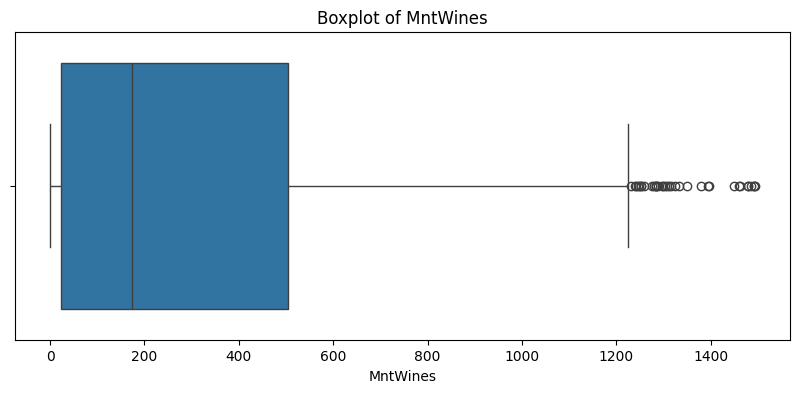

MntFruits has 0 low outliers (below -47.0) and 225 high outliers (above 81.0)


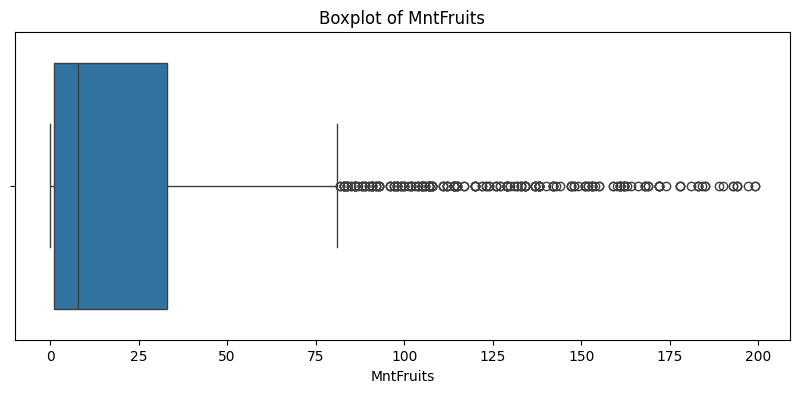

MntSweetProducts has 0 low outliers (below -47.0) and 248 high outliers (above 81.0)


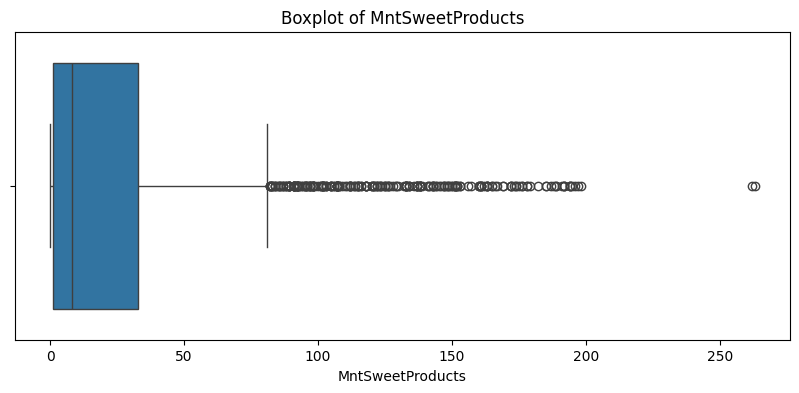

MntGoldProds has 0 low outliers (below -61.5) and 204 high outliers (above 126.5)


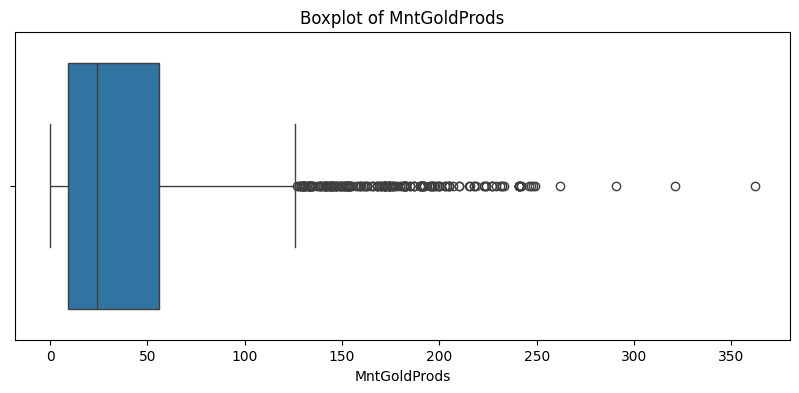

NumWebPurchases has 0 low outliers (below -3.0) and 11 high outliers (above 13.0)


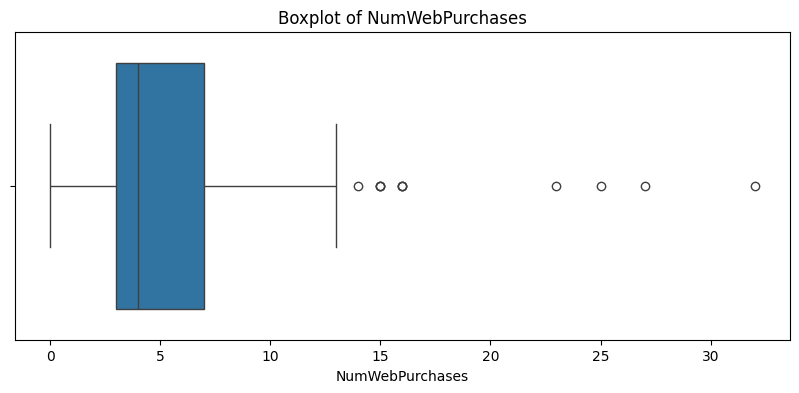

NumStorePurchases has 0 low outliers (below -4.5) and 0 high outliers (above 15.5)


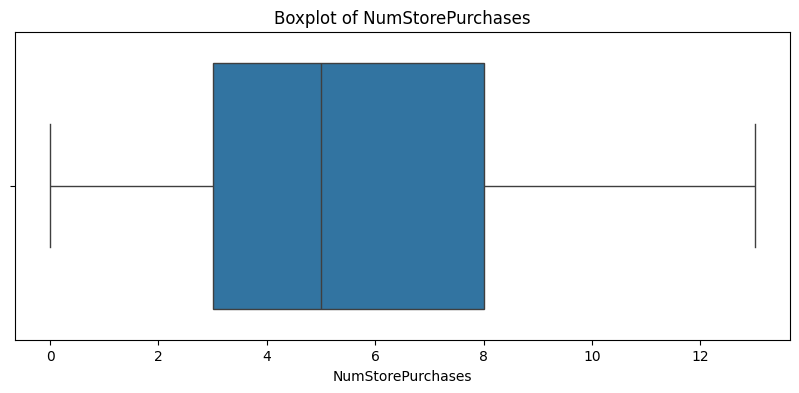

NumWebVisitsMonth has 0 low outliers (below -2.0) and 148 high outliers (above 14.0)


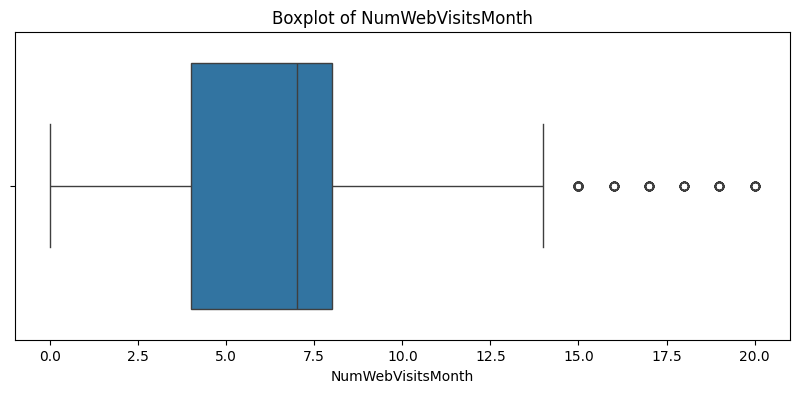

MntFishMeatProdcts has 0 low outliers (below -407.625) and 138 high outliers (above 735.375)


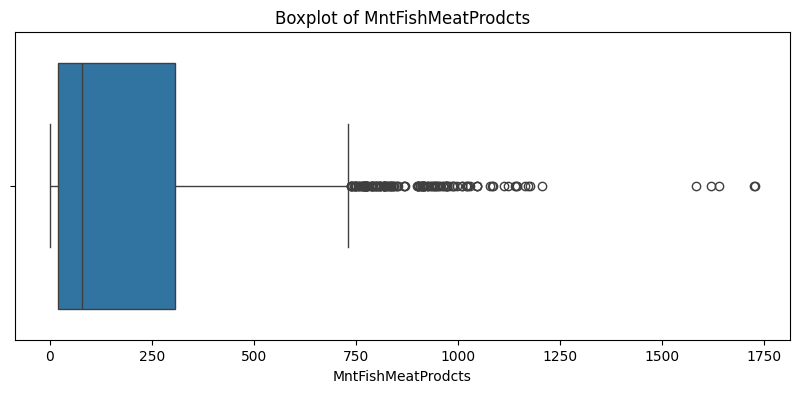

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

possible_outlier_columns = ['MntWines', 'MntFruits',
       'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'MntFishMeatProdcts']
# possible_outlier_columns = ['MntWines', 'MntFruits',
#        'MntSweetProducts', 'MntGoldProds', 'NumWebPurchases',
#        'NumStorePurchases', 'NumWebVisitsMonth', 
#        'Num_AcceptedCmp', 'MntFishMeatProdcts', 'TotalSpend',
#        'AvgSpendPerPurchase', 'TotalPurchases', 'WebToStorePurchaseRatio']

for feature in possible_outlier_columns:
    IQR_bounds(data, feature, 0.25, 0.75)
    plt.figure(figsize=(10, 4))
    sns.boxplot(x=data[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

From this we see that none of the features have any low outliers. We also see that
- `MntWines`: Have 35 potential outliers. These may be important in a business perspective, as they can be a part of a customer segment (e.g. high-expenditure customers). As the majority of the instances are significantly lower than these high outliers, they may however skew standardization and make  the clustering poorer. We will try to both remove and keep them, and see what makes the clustering better.  

- `MntFruits`: All possible outliers are evenly spread from Q3 to max. The max is however more than twice the Q3 limit, and including them will significanly skew the standardization. We will try to both include all, and to remove all instances above 2\*Q3. By removing the instances above 2\*Q3, we will still keep some of these potentially important values and not skew the standardization too much.

-  `MntSweetProducts`: The majority of possible outliers increase gradually from Q3, whereas two customers have spent significantly more (more than 25%). The gradual increase from Q3 suggests that these may be an important customer segment, whereas the two lone outliers will be removed. 

- `MntGoldProds`: As with `MntSweetProducts`, the outliers increase gradually and intensively from Q3 to 250 while four are significantly higher. These four will be removed. 

- `NumWebPurchases`: Only 11 outliers. Most of them are close to the Q3, whereas four are significantly higher. We will try to both remove all (as there are few outliers) and to only remove the highest four. 

- `NumStorePurchases`: No outliers. 

- `NumWebVisitsMonth`: 148 potential high outliers. The values do however not vary greatly, and these high web visits may be of importance. due to the possible importance and the significant amount, they will all be kept. 

- `MntFishMeatProducts`: The majority of possible outliers increase gradually from Q3, whereas a few customers have spent significantly more. The significant amount of outliers close to Q3, and their potential value, forces ut to keep them, while the highest outliers will be removed. 

In [8]:
def remove_outliers(df):
    _, bound_fruit = IQR_bounds(df, 'MntFruits', should_print=False)
    _, bound_web = IQR_bounds(df, 'NumWebPurchases', should_print=False)

    outliers_wine = df[(df['MntWines'] > 1400)].index
    print(f'Removing {len(outliers_wine)} wine outliers')
    df = df.drop(outliers_wine)
    
    outliers_fruit = df[(df['MntFruits'] > bound_fruit * 2)].index
    print(f'Removing {len(outliers_fruit)} fruit outliers')
    df = df.drop(outliers_fruit)
    
    outliers_sweets = df[(df['MntSweetProducts'] > 200)].index
    print(f'Removing {len(outliers_sweets)} sweets outliers')
    df = df.drop(outliers_sweets)

    outliers_gold = df[(df['MntGoldProds'] > 250)].index
    print(f'Removing {len(outliers_gold)} gold outliers')
    df = df.drop(outliers_gold)

    outliers_web_1 = df[(df['NumWebPurchases'] > bound_web)].index
    outliers_web_2 = df[(df['NumWebPurchases'] > 20)].index
    # print(f'Removing {len(outliers_web_1)} web purchase outliers')
    # df = df.drop(outliers_web_1)
    print(f'Removing {len(outliers_web_2)} web purchase outliers')
    df = df.drop(outliers_web_2)

    outliers_fish_meat = df[(df['MntFishMeatProdcts'] > 1250)].index
    print(f'Removing {len(outliers_fish_meat)} fish_meat outliers')
    df = df.drop(outliers_fish_meat)

    return df


In [9]:
data = remove_outliers(data)

Removing 9 wine outliers
Removing 34 fruit outliers
Removing 2 sweets outliers
Removing 3 gold outliers
Removing 0 web purchase outliers
Removing 5 fish_meat outliers


### Split data in testing and training

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train, test = train_test_split(data, test_size=0.25, random_state=42)

### Scale data
In the dataset the scale of the features varies greatly; from 0-3 in `Education` and 0-1727 in `MntFishMeatProdcts`. In order to use k-means without bias towards the higher-scale features, we apply standardizaton through `sklearn.MinMaxScaler`.

In [12]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

train_scaled = scaler.fit_transform(train)
test_scaled = scaler.transform(test)

# Clustering

*In order to explore the result of the different preprocessing techniques effectively, we have created a `Preprocessor` class and extracted the above methods to it. For the remaining part of the notebook, we utilize this class for preprocessing.*

### Clustering evaluation metrics
**Silhouette score:** The cohesion and separation of clusters. Ranges from -1 to 1, with higher values indicating better clustering.

**Davies-Bouldin score:** The ratio of within-cluster distances to between-cluster distances. A lower value is better.

**Inertia:** The sum of squared distances between samples and their cluster means. A lower value indicates better clustering. 

**Distortion:** The average of squared distances between samples and their cluster means. A lower value indicates better clustering.  

In [13]:

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
from preprocessor import Preprocessor
from sklearn.model_selection import KFold

prep = Preprocessor()

### Applying K-Means 


In [14]:
def elbow_method(df, max_k):
    '''Plot change of inertia for different values of k, 
    to get a reasonable guess for optimal amount of clusters'''
    db_scores = []
    db_scores_test = []
    silhouettes = []
    silhouettes_test = []
    distortions = []
    inertias = []
    K = range(1, max_k)
    
    for k in K:
        distortion = []
        inertia = []
        silhouette = []
        silhouette_test = []
        db = []
        db_test = []

        # Apply K-fold 
        kf = KFold(n_splits=5, shuffle=True, random_state=42)
        for train_index, test_index in kf.split(df):
        
            # Prepare DataFrames
            train = df.iloc[train_index]
            test = df.iloc[test_index]

            # Fit the model and make predictions
            kmeanModel = KMeans(n_clusters=k, random_state=42).fit(train)
            labels = kmeanModel.predict(train)
            test_labels = kmeanModel.predict(test)

            # Calculate evaluation metrics
            distortion.append(sum(np.min(cdist(train, kmeanModel.cluster_centers_,
                                                'euclidean'), axis=1)) / train.shape[0])
            inertia.append(kmeanModel.inertia_)
    
            # Can only use silhouette_score and davies_bouldin_score if there are more than one cluster
            if len(np.unique(labels)) > 1: 
                silhouette.append(silhouette_score(train, labels))
                db.append(davies_bouldin_score(train, labels))

            # Can only use silhouette_score and davies_bouldin_score if there are more than one cluster
            if len(np.unique(test_labels)) > 1: 
                silhouette_test.append(silhouette_score(test, test_labels))
                db_test.append(davies_bouldin_score(test, test_labels))

        # Append mean of all folds
        distortions.append(np.mean(distortion))
        inertias.append(np.mean(inertia))
        silhouettes_test.append(np.mean(silhouette_test))
        db_scores_test.append(np.mean(db_test))
        silhouettes.append(np.mean(silhouette))
        db_scores.append(np.mean(db))


    # Plot distortion
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method using Distortion')
    plt.show()

    # Plot inertia
    plt.plot(K, inertias, 'bx-')
    plt.xlabel('Values of K')
    plt.ylabel('Inertia')
    plt.title('The Elbow Method using Inertia')
    plt.show()

    # Plot silhouette score, both on test and train data
    plt.figure(figsize=(14, 5))  
    plt.subplot(1,2,1)
    sns.lineplot(x=K, y=silhouettes, marker='o', sort=False, color='blue')
    sns.lineplot(x=K, y=silhouettes_test, marker='o', sort=False, color='red')
    plt.xlabel('Values of K')
    plt.ylabel('Silhouette score')
    plt.title('The Elbow Method using Silhouette score')
    plt.show()

    # Plot db score, both on test and train data
    plt.figure(figsize=(14, 5))  
    plt.subplot(1,2,1)
    sns.lineplot(x=K, y=db_scores, marker='o', sort=False, color='blue')
    sns.lineplot(x=K, y=db_scores_test, marker='o', sort=False, color='red')
    plt.xlabel('Values of K')
    plt.ylabel('DB score')
    plt.title('The Elbow Method using DB score')
    plt.show()

/Users/magnus/development/education/ai_applied_to_engineering/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/magnus/development/education/ai_applied_to_engineering/venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


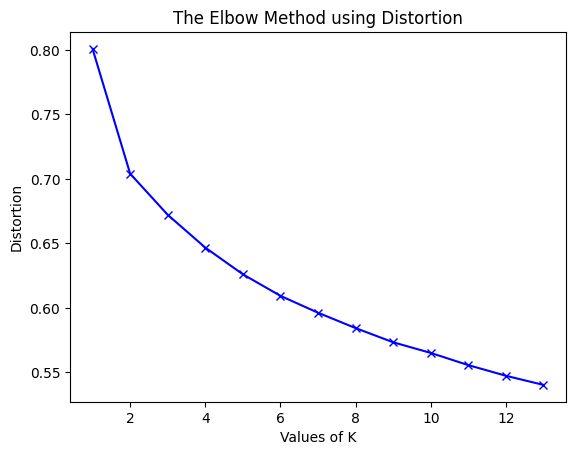

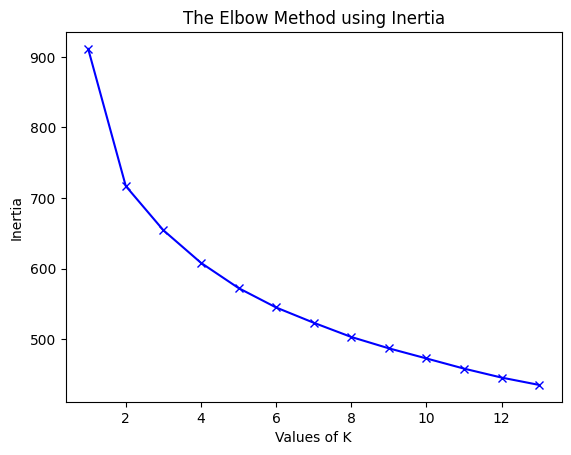

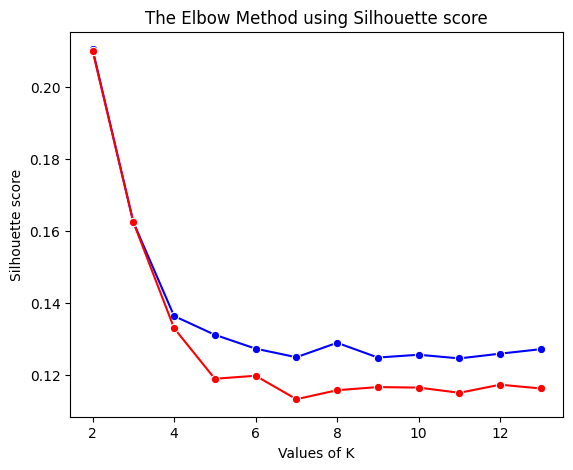

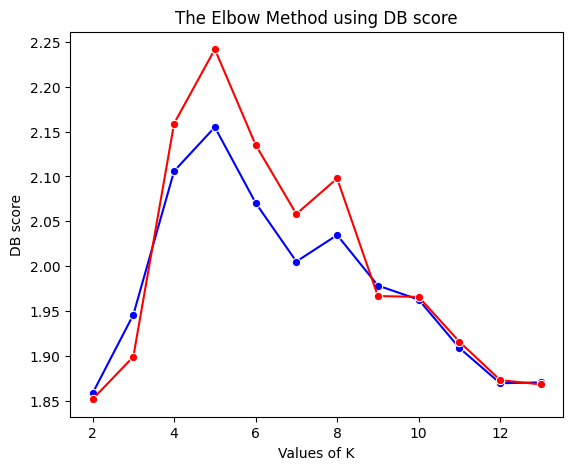

,Education,Kidhome,Recency,MntWines,MntFruits,MntSweetProducts,MntGoldProds,NumWebPurchases,NumStorePurchases,NumWebVisitsMonth,Age,Years_customer,Num_AcceptedCmp,MntFishMeatProdcts
count,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000,1672.000000
mean,0.611394,0.226974,0.491995,0.201766,0.133511,0.101704,0.121598,0.150755,0.439409,0.363038,0.446999,0.488636,0.091029,0.117997
std,0.250004,0.268664,0.290643,0.226074,0.200133,0.155910,0.143524,0.095972,0.247013,0.207592,0.198412,0.343168,0.180473,0.153213
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.000000,0.242424,0.015238,0.008794,0.003802,0.024862,0.093750,0.230769,0.250000,0.309091,0.500000,0.000000,0.011587
50%,0.500000,0.000000,0.494949,0.115874,0.040201,0.030418,0.066298,0.125000,0.384615,0.350000,0.418182,0.500000,0.000000,0.044612
75%,0.750000,0.500000,0.737374,0.330208,0.170854,0.125475,0.157459,0.218750,0.615385,0.412500,0.581818,0.500000,0.200000,0.176709
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
elbow_data, _ = prep.get_data(test_size=-1, remove_outliers=False)

elbow_method(elbow_data, 14)
elbow_data.describe()

None of the plots suggests strong clustering. 

# TODO SKRIV MER



In [16]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import plotly.express as px

# Initialize data
df = elbow_data.copy()

# Apply PCA to get two dimensions (for visualization)
pca = PCA(n_components=2, random_state=0)
pca_2_components = pca.fit_transform(df)
pca_2_df = pd.DataFrame(data=pca_2_components, columns=['Principal Component 1', 'Principal Component 2'])
print(f'PCA with `n_components=2` has an explained variance ratio of {np.sum(pca.explained_variance_ratio_)}')

# Apply PCA to get three dimensions (for visualization)
pca = PCA(n_components=3, random_state=0)
pca_3_components = pca.fit_transform(df)
pca_3_df = pd.DataFrame(data=pca_3_components, columns=['Principal Component 1', 'Principal Component 2', 'Principal Component 3'])

print(f'PCA with `n_components=3` has an explained variance ratio of {np.sum(pca.explained_variance_ratio_)}')
for n in range(2, 7):
    # Predict for n_components=k
    kmeans = KMeans(n_clusters=n, random_state=0)
    clusters = kmeans.fit_predict(df)
    # df['Cluster'] = clusters

    pca_2_df['Cluster'] = clusters
    pca_3_df['Cluster'] = clusters

    # Visualize two dimensions
    plt.figure(figsize=(10, 8))
    sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Cluster', data=pca_2_df, palette='viridis', style='Cluster', s=100)
    plt.title('Clusters Visualized After PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust legend position to not overlap the plot
    plt.grid(True)
    plt.show()

    # Visualize three dimensions
    # fig = plt.figure(figsize=(10, 8))
    # ax = fig.add_subplot(111, projection='3d')

    # colors = ['blue', 'green', 'red', 'purple', 'yellow']

    # for cluster in sorted(pca_3_df['Cluster'].unique()):

    #     cluster_data = pca_3_df[pca_3_df['Cluster'] == cluster]
    #     ax.scatter(cluster_data['Principal Component 1'], cluster_data['Principal Component 2'], cluster_data['Principal Component 3'], s=50, alpha=0.6, label=f'Cluster {cluster}', c=colors[cluster])

    # ax.set_xlabel('Principal Component 1')
    # ax.set_ylabel('Principal Component 2')
    # ax.set_zlabel('Principal Component 3')
    # ax.set_title('3D PCA Plot of Clusters')
    # ax.legend(title='Cluster')
    # plt.show()

    fig = px.scatter_3d(pca_3_df, x='Principal Component 1', y='Principal Component 2', z='Principal Component 3',
                    color='Cluster',
                    color_continuous_scale=px.colors.qualitative.D3)  # You can choose any color scale

    # Update the layout
    fig.update_layout(title='3D PCA Plot of Clusters',
                    scene=dict(
                        xaxis_title='Principal Component 1',
                        yaxis_title='Principal Component 2',
                        zaxis_title='Principal Component 3'
                    ),
                    coloraxis_colorbar=dict(
                        title='Cluster'
                    ))

    fig.show()

    # Clean up for nexxt iteration
    # df.drop('Cluster', axis=1)
    pca_2_df.drop('Cluster', axis=1)
    pca_3_df.drop('Cluster', axis=1)

ModuleNotFoundError: No module named 'plotly'

# TODO

### Characerize the clusters

In [ ]:
optimal_clusters = 5  # Assuming 5 is optimal from the elbow method
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(train_scaled)

train = pd.DataFrame(scaler.inverse_transform(train_scaled), index=train.index, columns=train.columns)

centroids = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=train.columns)

In [ ]:
# Cluster centroids
print(centroids)

   Education   Kidhome    Recency    MntWines  MntFruits  MntSweetProducts  \
0   3.530120  0.759036  49.658635   46.847390   3.919679          3.987952   
1   3.221239  0.070796  56.588496  592.318584  85.353982         93.561947   
2   4.069124  0.105991  53.824885  804.571429  23.986175         25.857143   
3   3.227953  0.815308  49.549085   58.635607   6.537438          6.351082   
4   3.557522  0.100295  41.660767  386.235988  27.023599         29.162242   

   MntGoldProds  NumWebPurchases  NumStorePurchases  NumWebVisitsMonth  \
0     10.714859         2.827309           3.261044           7.293173   
1     89.676991         6.823009           8.685841           6.995575   
2     68.714286         6.930876           8.451613           6.520737   
3     21.079867         3.489185           3.407654           8.608985   
4     54.165192         5.876106           8.044248           5.238938   

         Age  Years_customer  Num_AcceptedCmp  MntFishMeatProdcts  TotalSpend  \
0  50

In [ ]:
# Add cluster labels to your original DataFrame
train['Cluster'] = kmeans.labels_

# Calculate mean for all numerical columns for each cluster
cluster_profiles = train.groupby('Cluster').mean()

# Display cluster profiles
print(cluster_profiles)

         Education   Kidhome    Recency    MntWines  MntFruits  \
Cluster                                                          
0         3.530120  0.759036  49.658635   46.847390   3.919679   
1         3.221239  0.070796  56.588496  592.318584  85.353982   
2         4.069124  0.105991  53.824885  804.571429  23.986175   
3         3.227953  0.815308  49.549085   58.635607   6.537438   
4         3.557522  0.100295  41.660767  386.235988  27.023599   

         MntSweetProducts  MntGoldProds  NumWebPurchases  NumStorePurchases  \
Cluster                                                                       
0                3.987952     10.714859         2.827309           3.261044   
1               93.561947     89.676991         6.823009           8.685841   
2               25.857143     68.714286         6.930876           8.451613   
3                6.351082     21.079867         3.489185           3.407654   
4               29.162242     54.165192         5.876106       

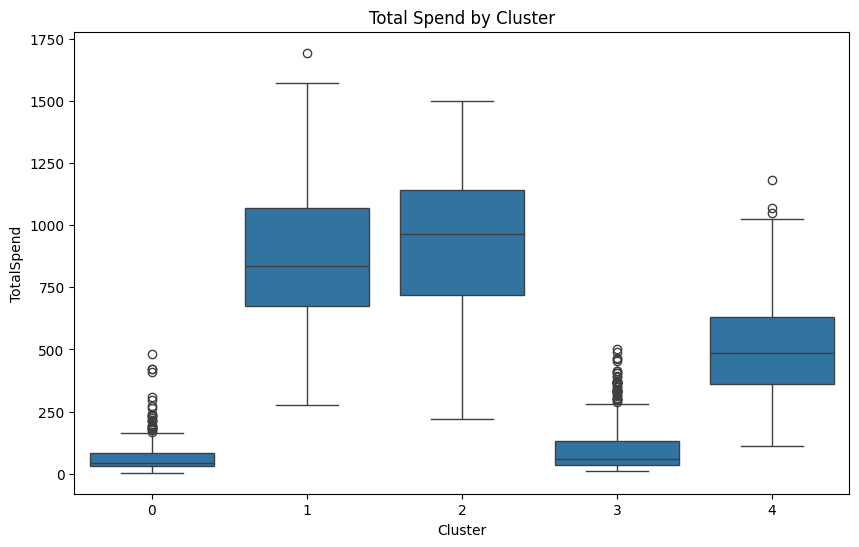

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Visualizing the distribution of a feature like 'TotalSpend' across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='TotalSpend', data=train)
plt.title('Total Spend by Cluster')
plt.show()

# PCA

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

train, test = prep.get_data(remove_outliers=True)
all_data_scaler = MinMaxScaler()
data_scaled = all_data_scaler.fit_transform(train)

Removing 9 wine outliers
Removing 34 fruit outliers
Removing 2 sweets outliers
Removing 3 gold outliers
Removing 0 web purchase outliers
Removing 5 fish_meat outliers


#### One principal component

PCA with `n_components=1` gives an explained variance ratio of ≈0.364

In [ ]:
pca_1 = PCA(n_components=1)
pca_1_components = pca_1.fit_transform(data_scaled)

print(pca_1.explained_variance_ratio_)

[0.29445562]


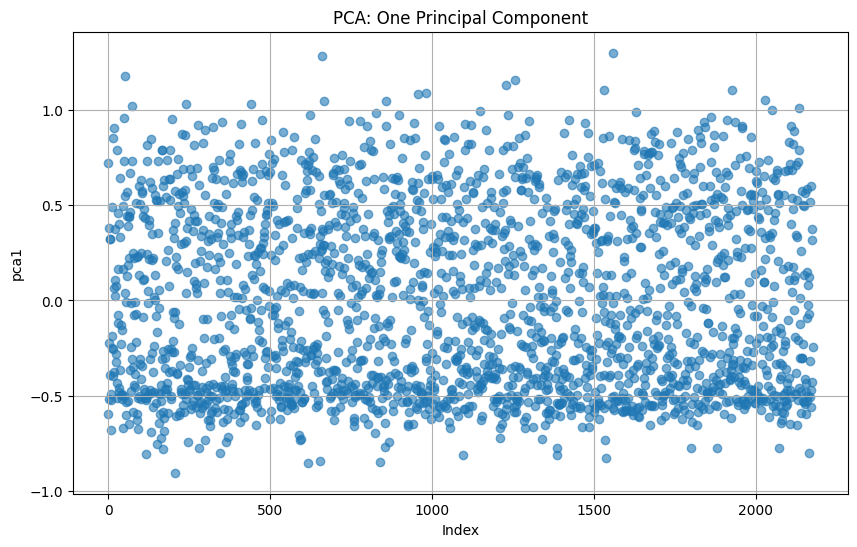

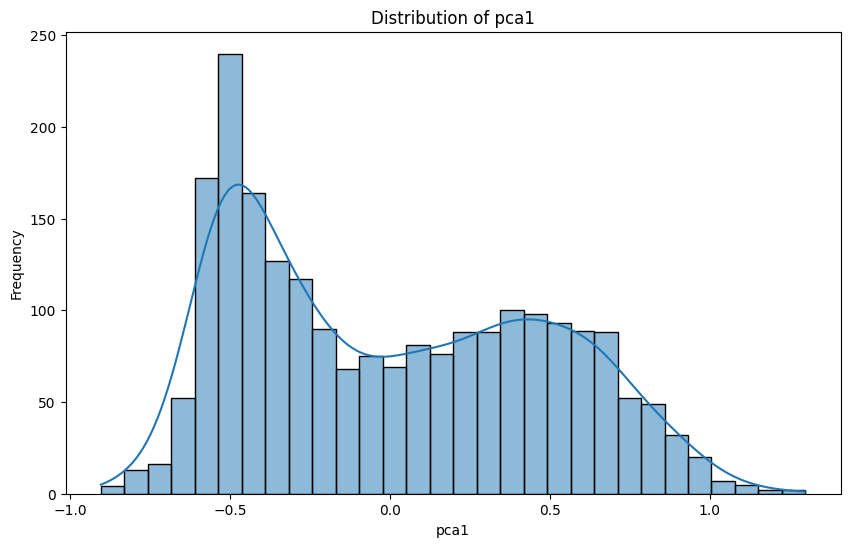

In [ ]:
pca_1_df = pd.DataFrame(data=pca_1_components, columns=['pca1'])

plt.figure(figsize=(10, 6))
plt.scatter(pca_1_df.index, pca_1_df['pca1'], alpha=0.6)
plt.title('PCA: One Principal Component')
plt.xlabel('Index')
plt.ylabel('pca1')
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(pca_1_df['pca1'], bins=30, kde=True)
plt.title('Distribution of pca1')
plt.xlabel('pca1')
plt.ylabel('Frequency')
plt.show()


#### Two principal components

PCA with `n_components=2` gives an explained variance ratio of ≈0.49

In [ ]:

pca_2 = PCA(n_components=2)
pca_2_components = pca_2.fit_transform(data_scaled)

print(pca_2.explained_variance_ratio_.sum())

0.44957234337704954


/var/folders/0j/09kq_s112r5gz6_30yv10dwr0000gn/T/ipykernel_56147/333784047.py:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



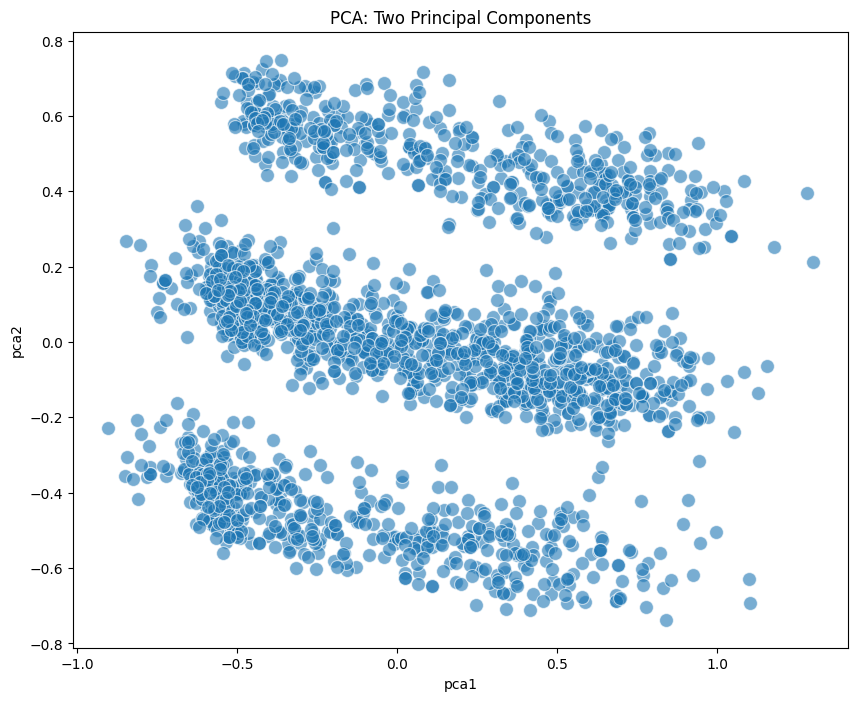

In [ ]:
pca_2_df = pd.DataFrame(data=pca_2_components, columns=['pca1', 'pca2'])

plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2',  data=pca_2_df, palette='viridis', s=100, alpha=0.6)
plt.title('PCA: Two Principal Components')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.show()

PCA with neither one nor two principal components serves to identify possible clusters in the dataset. 

We further try to apply PCA with a higher number of `n_components` and train a k-means model using the resulting principal components. We then compare the clustering we get from this model to the clusterings from kmeans on the original features.

### t-SNE

In [ ]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
tsne_2_components = tsne.fit_transform(data_scaled)
tsne_2_df = pd.DataFrame(data=tsne_2_components, columns=['tsne1', 'tsne2'])

Index(['tsne1', 'tsne2'], dtype='object')


/var/folders/0j/09kq_s112r5gz6_30yv10dwr0000gn/T/ipykernel_56147/3642886050.py:4: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



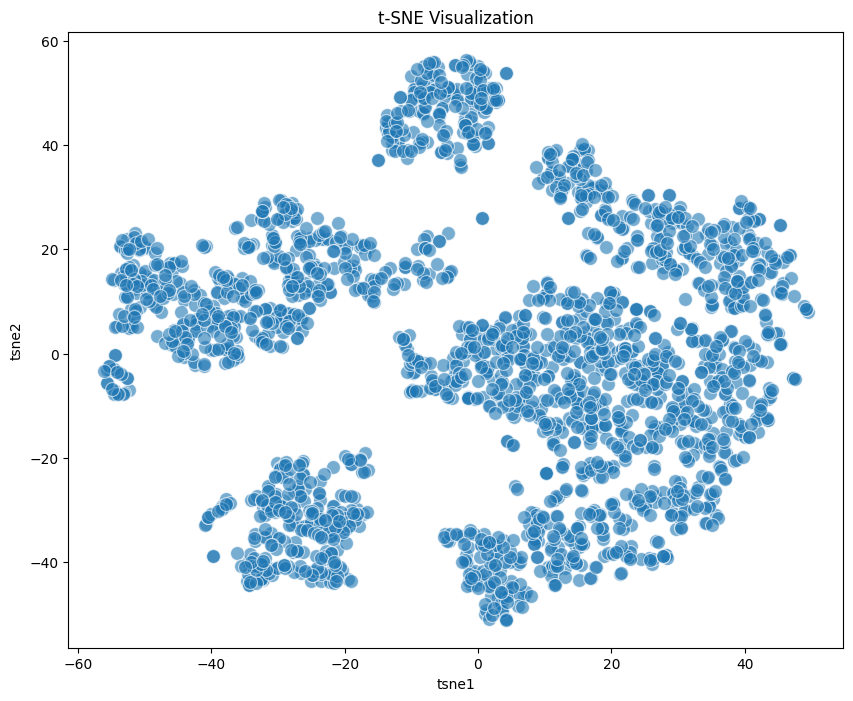

/Users/magnus/development/education/ai_applied_to_engineering/venv/lib/python3.10/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning:

Mean of empty slice.

/Users/magnus/development/education/ai_applied_to_engineering/venv/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning:

invalid value encountered in scalar divide



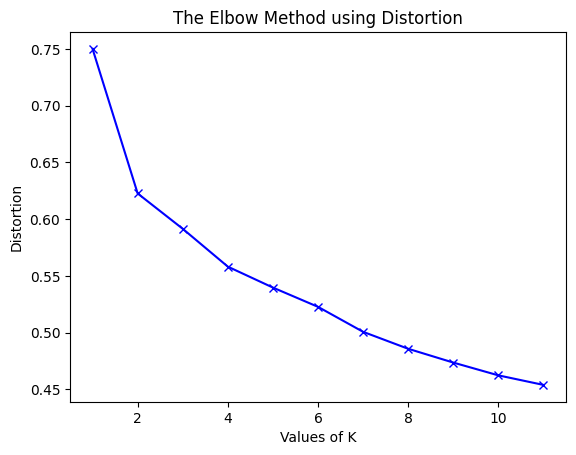

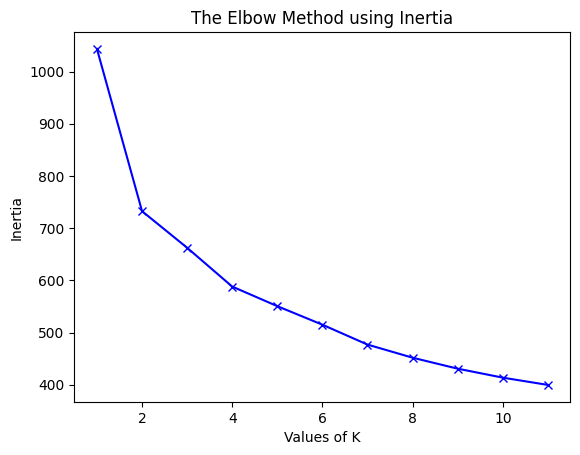

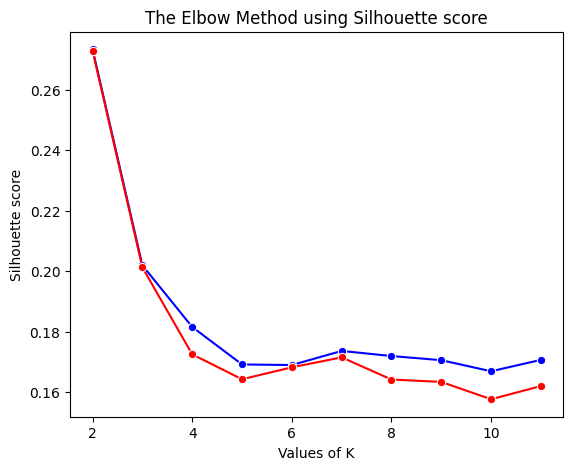

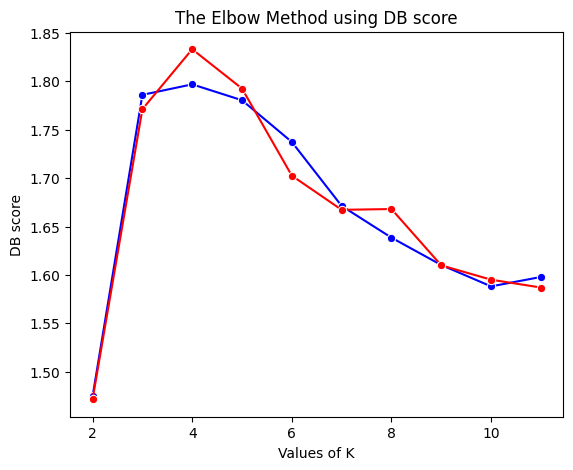

In [ ]:
tsne_2_df = pd.DataFrame(data=tsne_2_components, columns=['tsne1', 'tsne2'])

plt.figure(figsize=(10, 8))
sns.scatterplot(x='tsne1', y='tsne2', data=tsne_2_df, palette='viridis', s=100, alpha=0.6)
plt.title('t-SNE Visualization')
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.show()
pca_6 = PCA(n_components=6)
pca_6_components = pca_6.fit_transform(data_scaled)
pca_6_df = pd.DataFrame(data=pca_6_components, columns=[f'pca_{k}' for k in range(1, 7)])

elbow_method(pca_6_df, 12)